In [6]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import csv
import os

In [2]:
import requests
import requests as req
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import time
import pickle

In [3]:
from html_table_parser import parser_functions
from html_table_parser import parser_functions as parser

In [4]:
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from datetime import datetime

In [5]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from konlpy.tag import Kkma, Komoran, Okt, Hannanum

### 기사 갖고오기

In [7]:
path = 'D:\B_Project5\기사/'
file_list = os.listdir(path)

In [92]:
df = pd.DataFrame()
for i in file_list:
    data = pd.read_pickle(path + i)
    df = pd.concat([df,data])

In [96]:
df

,level_0,index,기업,날짜,제목,내용
0,0,0,AJ네트웍스,한국경제2017.01.17.네이버뉴스,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화",[ 김은지 기자 ] 종합렌탈기업 AJ네트웍스는 17일 수출용 자동차 부품 전용 ...
1,1,1,AJ네트웍스,파이낸셜뉴스2017.01.17.네이버뉴스,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓",주가등락폭이 작아 최근 한달간 AJ네트웍스의 상장주식수 대비 거래량을 비교해보니...
2,2,2,AJ네트웍스,컨슈머타임스2017.01.17.,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락'",[컨슈머타임스 김동호 기자] AJ네트웍스가 액면분할 실시 후 첫 거래일인 17...
3,3,3,AJ네트웍스,더벨2017.01.05.,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...
4,4,4,AJ네트웍스,전자신문2017.01.31.네이버뉴스,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적)",표준편차 수익율 위험대비 수익율 AJ네트웍스 2.6% -83.7% -32.1 비...
...,...,...,...,...,...,...
2621069,1872,5,힘스,인천일보2021.12.05.,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표],17%) ▲힘스9450(3.05%) ▲CBI4440(2.90%) ▲펌텍코리아18...
2621070,1873,6,힘스,글로벌이코노믹2021.12.19.,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...
2621071,1874,7,힘스,시사저널이코노미2021.12.15.,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스..."
2621072,1875,8,힘스,울산매일신문2021.12.01.,스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다,"협약에는 울산과학대학교를 비롯해 울산시, 현대중공업, 현대미포조선, 현대모스, ..."


In [113]:

df

,기업,날짜,제목,내용
0,AJ네트웍스,한국경제2017.01.17.네이버뉴스,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화",[ 김은지 기자 ] 종합렌탈기업 AJ네트웍스는 17일 수출용 자동차 부품 전용 ...
1,AJ네트웍스,파이낸셜뉴스2017.01.17.네이버뉴스,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓",주가등락폭이 작아 최근 한달간 AJ네트웍스의 상장주식수 대비 거래량을 비교해보니...
2,AJ네트웍스,컨슈머타임스2017.01.17.,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락'",[컨슈머타임스 김동호 기자] AJ네트웍스가 액면분할 실시 후 첫 거래일인 17...
3,AJ네트웍스,더벨2017.01.05.,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...
4,AJ네트웍스,전자신문2017.01.31.네이버뉴스,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적)",표준편차 수익율 위험대비 수익율 AJ네트웍스 2.6% -83.7% -32.1 비...
...,...,...,...,...
2621069,힘스,인천일보2021.12.05.,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표],17%) ▲힘스9450(3.05%) ▲CBI4440(2.90%) ▲펌텍코리아18...
2621070,힘스,글로벌이코노믹2021.12.19.,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...
2621071,힘스,시사저널이코노미2021.12.15.,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스..."
2621072,힘스,울산매일신문2021.12.01.,스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다,"협약에는 울산과학대학교를 비롯해 울산시, 현대중공업, 현대미포조선, 현대모스, ..."


### 기사 날짜 정리

In [114]:
for i in df['날짜']:
    if '3652' in i:
        print(i)

 인터뷰3652019.01.23. 
 인터뷰3652019.02.22. 
 인터뷰3652019.10.27. 
 인터뷰3652019.11.25. 
 인터뷰3652020.04.22. 
 인터뷰3652021.02.18. 
 인터뷰3652021.05.31. 
 인터뷰3652018.08.31. 
 인터뷰3652019.02.28. 
 인터뷰3652019.12.30. 
 인터뷰3652020.04.29. 
 인터뷰3652020.05.19. 
 인터뷰3652019.06.21. 
 인터뷰3652017.09.30. 
 인터뷰3652017.11.09. 
 인터뷰3652021.07.16. 
 인터뷰3652021.07.16. 
 인터뷰3652021.10.18. 
 인터뷰3652020.10.05. 
 인터뷰3652018.08.31. 
 인터뷰3652020.01.30. 
 인터뷰3652021.11.26. 
 인터뷰3652019.03.20. 
 인터뷰3652021.09.03. 
 인터뷰3652021.11.01. 
 인터뷰3652021.01.20. 
 인터뷰3652020.07.31. 
 인터뷰3652019.12.31. 
 인터뷰3652021.09.16. 
 인터뷰3652018.10.31. 
 인터뷰3652019.04.26. 
 인터뷰3652020.05.13. 
 인터뷰3652019.12.26. 
 인터뷰3652021.06.22. 
 인터뷰3652021.12.24. 
 인터뷰3652019.10.23. 
 인터뷰3652020.09.15. 
 인터뷰3652021.07.07. 
 인터뷰3652018.11.27. 
 인터뷰3652021.10.26. 
 인터뷰3652021.11.30. 
 인터뷰3652017.10.18. 
 인터뷰3652017.11.18. 
 인터뷰3652018.07.21. 
 인터뷰3652020.05.21. 
 인터뷰3652020.05.18. 
 인터뷰3652018.11.02. 
 인터뷰3652020.06.03. 
 인터뷰3652020.08.04. 
 인터뷰3652020.06.03. 


In [120]:
for i in df['날짜']:
    if '3652' in i:  
        i = i.replace('365','')
        print(i)

 인터뷰2019.01.23. 
 인터뷰2019.02.22. 
 인터뷰2019.10.27. 
 인터뷰2019.11.25. 
 인터뷰2020.04.22. 
 인터뷰2021.02.18. 
 인터뷰2021.05.31. 
 인터뷰2018.08.31. 
 인터뷰2019.02.28. 
 인터뷰2019.12.30. 
 인터뷰2020.04.29. 
 인터뷰2020.05.19. 
 인터뷰2019.06.21. 
 인터뷰2017.09.30. 
 인터뷰2017.11.09. 
 인터뷰2021.07.16. 
 인터뷰2021.07.16. 
 인터뷰2021.10.18. 
 인터뷰2020.10.05. 
 인터뷰2018.08.31. 
 인터뷰2020.01.30. 
 인터뷰2021.11.26. 
 인터뷰2019.03.20. 
 인터뷰2021.09.03. 
 인터뷰2021.11.01. 
 인터뷰2021.01.20. 
 인터뷰2020.07.31. 
 인터뷰2019.12.31. 
 인터뷰2021.09.16. 
 인터뷰2018.10.31. 
 인터뷰2019.04.26. 
 인터뷰2020.05.13. 
 인터뷰2019.12.26. 
 인터뷰2021.06.22. 
 인터뷰2021.12.24. 
 인터뷰2019.10.23. 
 인터뷰2020.09.15. 
 인터뷰2021.07.07. 
 인터뷰2018.11.27. 
 인터뷰2021.10.26. 
 인터뷰2021.11.30. 
 인터뷰2017.10.18. 
 인터뷰2017.11.18. 
 인터뷰2018.07.21. 
 인터뷰2020.05.21. 
 인터뷰2020.05.18. 
 인터뷰2018.11.02. 
 인터뷰2020.06.03. 
 인터뷰2020.08.04. 
 인터뷰2020.06.03. 
 인터뷰2020.08.04. 
 인터뷰2018.10.04. 
 인터뷰2017.09.30. 
 인터뷰2021.11.02. 
 인터뷰2017.11.30. 
 인터뷰2019.10.23. 
 인터뷰2021.04.29. 
 인터뷰2020.04.21. 
 인터뷰2019.12.31

In [128]:
df['날짜'] = df['날짜'].apply(lambda x : x.replace('365', '') if '3652' in x else x)

In [129]:
df['날짜'] = df['날짜'].apply(lambda x : str(datetime.strptime(re.search(r'\d{4}.\d{2}.\d{2}', x).group(), '%Y.%m.%d').date()))

In [130]:
df

,기업,날짜,제목,내용
0,AJ네트웍스,2017-01-17,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화",[ 김은지 기자 ] 종합렌탈기업 AJ네트웍스는 17일 수출용 자동차 부품 전용 ...
1,AJ네트웍스,2017-01-17,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓",주가등락폭이 작아 최근 한달간 AJ네트웍스의 상장주식수 대비 거래량을 비교해보니...
2,AJ네트웍스,2017-01-17,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락'",[컨슈머타임스 김동호 기자] AJ네트웍스가 액면분할 실시 후 첫 거래일인 17...
3,AJ네트웍스,2017-01-05,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...
4,AJ네트웍스,2017-01-31,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적)",표준편차 수익율 위험대비 수익율 AJ네트웍스 2.6% -83.7% -32.1 비...
...,...,...,...,...
2621069,힘스,2021-12-05,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표],17%) ▲힘스9450(3.05%) ▲CBI4440(2.90%) ▲펌텍코리아18...
2621070,힘스,2021-12-19,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...
2621071,힘스,2021-12-15,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스..."
2621072,힘스,2021-12-01,스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다,"협약에는 울산과학대학교를 비롯해 울산시, 현대중공업, 현대미포조선, 현대모스, ..."


### 기사 토큰화

In [131]:
df['제목_내용'] = df['제목'] + df['내용']

In [133]:
okt = Okt()
n_ = []
title_rename = []

for i in range(len(df)):
    if(i % 10000 == 0):
        print(i, '단계 완료')
#     title_rename.append(re.sub("[\(\[].*?[\)\]]", "",df.iloc[i]['제목_내용']))
    n_.append(' '.join(okt.morphs(df.iloc[i]['제목_내용'])))
df['token'] = n_
df = df[df['token'] != '']
df['token'] = df['token'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

0 단계 완료
10000 단계 완료
20000 단계 완료
30000 단계 완료
40000 단계 완료
50000 단계 완료
60000 단계 완료
70000 단계 완료
80000 단계 완료
90000 단계 완료
100000 단계 완료
110000 단계 완료
120000 단계 완료
130000 단계 완료
140000 단계 완료
150000 단계 완료
160000 단계 완료
170000 단계 완료
180000 단계 완료
190000 단계 완료
200000 단계 완료
210000 단계 완료
220000 단계 완료
230000 단계 완료
240000 단계 완료
250000 단계 완료
260000 단계 완료
270000 단계 완료
280000 단계 완료
290000 단계 완료
300000 단계 완료
310000 단계 완료
320000 단계 완료
330000 단계 완료
340000 단계 완료
350000 단계 완료
360000 단계 완료
370000 단계 완료
380000 단계 완료
390000 단계 완료
400000 단계 완료
410000 단계 완료
420000 단계 완료
430000 단계 완료
440000 단계 완료
450000 단계 완료
460000 단계 완료
470000 단계 완료
480000 단계 완료
490000 단계 완료
500000 단계 완료
510000 단계 완료
520000 단계 완료
530000 단계 완료
540000 단계 완료
550000 단계 완료
560000 단계 완료
570000 단계 완료
580000 단계 완료
590000 단계 완료
600000 단계 완료
610000 단계 완료
620000 단계 완료
630000 단계 완료
640000 단계 완료
650000 단계 완료
660000 단계 완료
670000 단계 완료
680000 단계 완료
690000 단계 완료
700000 단계 완료
710000 단계 완료
720000 단계 완료
730000 단계 완료
740000 단계 완료
750000 단계 완료
760000 단계 완료
770000 단계 완료


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7248/2394954058.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['token'] = df['token'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [134]:
df

,기업,날짜,제목,내용,제목_내용,token
0,AJ네트웍스,2017-01-17,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화",[ 김은지 기자 ] 종합렌탈기업 AJ네트웍스는 17일 수출용 자동차 부품 전용 ...,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화 [ 김은지 기자 ]...",네트웍 스 리터 너 블 케이스 로 사업 확장 해외진출 가시 화 김은지 기...
1,AJ네트웍스,2017-01-17,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓",주가등락폭이 작아 최근 한달간 AJ네트웍스의 상장주식수 대비 거래량을 비교해보니...,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓ 주가등락폭이...",네트웍 스 주 신저 가 기록 주가 등락 폭 이 작아 최근 한 달 간...
2,AJ네트웍스,2017-01-17,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락'",[컨슈머타임스 김동호 기자] AJ네트웍스가 액면분할 실시 후 첫 거래일인 17...,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락' [컨슈머...",특징 주 액면 분할 약 발 안 받네 네트웍 스 거래 재개 첫날 급락 ...
3,AJ네트웍스,2017-01-05,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...,"[더벨]AJ네트웍스, 금융비용 부담 '가중' AJ네트웍스의 금융비용 부담이 가중되...",더벨 네트웍 스 금융 비용 부담 가중 네트웍 스 의 금융 비용 부담 이...
4,AJ네트웍스,2017-01-31,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적)",표준편차 수익율 위험대비 수익율 AJ네트웍스 2.6% -83.7% -32.1 비...,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적) 표준편차...",로봇 뉴스 홀 외국인 과 기관 은 순 매도 개인 은 순 매수 한 달 누적...
...,...,...,...,...,...,...
2621069,힘스,2021-12-05,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표],17%) ▲힘스9450(3.05%) ▲CBI4440(2.90%) ▲펌텍코리아18...,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표] 17%) ▲힘스94...,인천 상장 기업 주간 주가 동향 년 월 일 자 표 힘스 ...
2621070,힘스,2021-12-19,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하......,뉴욕 증시 비아그라 성인 용품 온라인 판매 밈 주식 힘스 앤 허스 몰락하 ...
2621071,힘스,2021-12-15,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스...","'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체 필옵틱스, HB테크놀러지...",보릿고개 디스플레이 장비 사 돌파구 는 차전지 반도체 필옵틱스 테크 놀...
2621072,힘스,2021-12-01,스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다,"협약에는 울산과학대학교를 비롯해 울산시, 현대중공업, 현대미포조선, 현대모스, ...",스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다 협약에는 울산과학대...,스마트 친환경 선박 전문 인력 양성 산학 연관 이 뭉쳤다 협약 에는 울 산과...


### 감성사전

In [135]:
finan_dic = pd.read_excel('finance감성사전.xlsx', index_col='Unnamed: 0')
finan_dic['score'] = finan_dic['pos'].apply(lambda x : 1 if x == 1 else -1)
finan_dic

,neg,pos,score
결국,1,0,-1
결함,1,0,-1
공허한,1,0,-1
과적,1,0,-1
극심한,1,0,-1
...,...,...,...
해결,0,1,1
호황,0,1,1
확보,0,1,1
활력,0,1,1


### 긍정

In [136]:
df['senti_score'] = df['token'].apply(lambda x : sum([finan_dic.loc[token,'score'] for token in x.split() if token in finan_dic.index]))

In [137]:
df['senti_state'] = df['senti_score'].apply(lambda x : 1 if x > 0 else x).apply(lambda x : -1 if x < 0 else x)

In [187]:
df

,기업,날짜,제목,내용,제목_내용,token,senti_score,senti_state
0,AJ네트웍스,2017-01-17,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화",[ 김은지 기자 ] 종합렌탈기업 AJ네트웍스는 17일 수출용 자동차 부품 전용 ...,"AJ네트웍스, '리터너블 케이스'로 사업 확장…해외진출 가시화 [ 김은지 기자 ]...",네트웍 스 리터 너 블 케이스 로 사업 확장 해외진출 가시 화 김은지 기...,0,0
1,AJ네트웍스,2017-01-17,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓",주가등락폭이 작아 최근 한달간 AJ네트웍스의 상장주식수 대비 거래량을 비교해보니...,"[fnRASSI]AJ네트웍스, 52주 신저가 기록...-5.38% ↓ 주가등락폭이...",네트웍 스 주 신저 가 기록 주가 등락 폭 이 작아 최근 한 달 간...,0,0
2,AJ네트웍스,2017-01-17,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락'",[컨슈머타임스 김동호 기자] AJ네트웍스가 액면분할 실시 후 첫 거래일인 17...,"[특징주] 액면분할 약발 안받네...AJ네트웍스, 거래재개 첫날 '급락' [컨슈머...",특징 주 액면 분할 약 발 안 받네 네트웍 스 거래 재개 첫날 급락 ...,1,1
3,AJ네트웍스,2017-01-05,"[더벨]AJ네트웍스, 금융비용 부담 '가중'",AJ네트웍스의 금융비용 부담이 가중되고 있다. 과도한 차입금으로 이자 비용이 늘...,"[더벨]AJ네트웍스, 금융비용 부담 '가중' AJ네트웍스의 금융비용 부담이 가중되...",더벨 네트웍 스 금융 비용 부담 가중 네트웍 스 의 금융 비용 부담 이...,0,0
4,AJ네트웍스,2017-01-31,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적)",표준편차 수익율 위험대비 수익율 AJ네트웍스 2.6% -83.7% -32.1 비...,"[로봇뉴스]KISCO홀_외국인과 기관은 순매도, 개인은 순매수(한달누적) 표준편차...",로봇 뉴스 홀 외국인 과 기관 은 순 매도 개인 은 순 매수 한 달 누적...,0,0
...,...,...,...,...,...,...,...,...
2621069,힘스,2021-12-05,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표],17%) ▲힘스9450(3.05%) ▲CBI4440(2.90%) ▲펌텍코리아18...,[인천 상장기업 주간 주가 동향] 2021년 12월3일자[표] 17%) ▲힘스94...,인천 상장 기업 주간 주가 동향 년 월 일 자 표 힘스 ...,0,0
2621070,힘스,2021-12-19,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하...,주식 ‘힘스 앤 허스’(Hims and Hers)가 미국 뉴욕 증시에서 잔혹한 ...,[뉴욕 증시] 비아그라·성인용품 온라인 판매 밈 주식 '힘스 앤 허스' 몰락하......,뉴욕 증시 비아그라 성인 용품 온라인 판매 밈 주식 힘스 앤 허스 몰락하 ...,0,0
2621071,힘스,2021-12-15,"'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체","필옵틱스, HB테크놀러지, 예스티, 제이스텍, 엘아이에스, 에프엔에스테크, 힘스...","'보릿고개' 디스플레이 장비사, 돌파구는 2차전지·반도체 필옵틱스, HB테크놀러지...",보릿고개 디스플레이 장비 사 돌파구 는 차전지 반도체 필옵틱스 테크 놀...,0,0
2621072,힘스,2021-12-01,스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다,"협약에는 울산과학대학교를 비롯해 울산시, 현대중공업, 현대미포조선, 현대모스, ...",스마트·친환경 선박 전문인력 양성 산학연관(産學硏官)이 뭉쳤다 협약에는 울산과학대...,스마트 친환경 선박 전문 인력 양성 산학 연관 이 뭉쳤다 협약 에는 울 산과...,0,0


In [139]:
sd = pd.DataFrame(df.groupby('기업')['senti_state'].value_counts())
sd

senti_state
기업     senti_state             
AJ네트웍스  0                  1516
       -1                   260
        1                   233
AK 홀딩스  0                  1900
       -1                   334
...                         ...
희림      1                   304
       -1                   204
힘스      0                  1447
        1                   217
       -1                   213

[3662 rows x 1 columns]

In [146]:
sd = sd.sort_index()
sd

senti_state
기업     senti_state             
AJ네트웍스 -1                   260
        0                  1516
        1                   233
AK 홀딩스 -1                   334
        0                  1900
...                         ...
희림      0                  1968
        1                   304
힘스     -1                   213
        0                  1447
        1                   217

[3662 rows x 1 columns]

array([[<AxesSubplot:title={'center':'AJ네트웍스'}>,
        <AxesSubplot:title={'center':'AK 홀딩스'}>,
        <AxesSubplot:title={'center':'BGF'}>, ...,
        <AxesSubplot:title={'center':'EveryBot'}>,
        <AxesSubplot:title={'center':'F&F홀딩스'}>,
        <AxesSubplot:title={'center':'FSN'}>],
       [<AxesSubplot:title={'center':'Flask'}>,
        <AxesSubplot:title={'center':'GC Cell'}>,
        <AxesSubplot:title={'center':'GKL'}>, ...,
        <AxesSubplot:title={'center':'KCC건설'}>,
        <AxesSubplot:title={'center':'KCI'}>,
        <AxesSubplot:title={'center':'KCTC'}>],
       [<AxesSubplot:title={'center':'KC그린홀딩스'}>,
        <AxesSubplot:title={'center':'KC코트렐'}>,
        <AxesSubplot:title={'center':'KEC'}>, ...,
        <AxesSubplot:title={'center':'LS Electric'}>,
        <AxesSubplot:title={'center':'LS네트웍스'}>,
        <AxesSubplot:title={'center':'LS전선아시아'}>],
       ...,
       [<AxesSubplot:title={'center':'한화'}>,
        <AxesSubplot:title={'center':'한화3우B'}>,
     

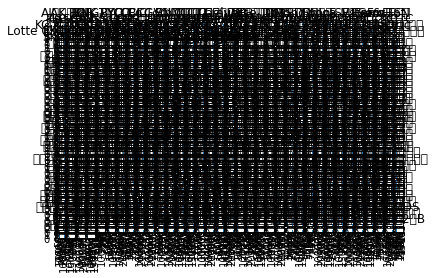

In [186]:
sd.hist(column='senti_state', by='기업')

In [151]:
pos_name = []

for i in range(2,3662,3):
    if int(sd.iloc[i].values) > int(sd.iloc[i-2]):
        pos_name.append(sd.index[i][0])

In [162]:
pos_name

['BGF',
 'BNK 금융그룹',
 'BYC',
 'BYC Co',
 'CBI',
 'CJ CGV',
 'CJ Corp',
 'CJ ENM',
 'CJ 그룹',
 'CJ대한통운',
 'CJ씨푸드',
 'CJ제일제당',
 'CJ프레시웨이',
 'DB',
 'E M',
 'EveryBot',
 'F&F홀딩스',
 'FSN',
 'HDC현대EP',
 'HLB',
 'HMM',
 'IHQ',
 'ISC',
 'JTC',
 'JW중외제약',
 'JYP Ent.',
 'KB금융',
 'KCC',
 'KCC건설',
 'KCI',
 'KG ETS',
 'KG이니시스',
 'KMH',
 'KSS해운',
 'KT',
 'KT&G',
 'KTcs',
 'LF',
 'LG',
 'LG 화학',
 'LG디스플레이',
 'LG생활건강',
 'LG유플러스',
 'LG이노텍',
 'LG전자',
 'LG헬로비전',
 'LG화학',
 'LIG넥스원',
 'LS',
 'LS Electric',
 'LS전선아시아',
 'LX세미콘',
 'LX인터내셔널',
 'LX하우시스',
 'NAVER',
 'S-oil',
 'SBI인베스트먼트',
 'SDN',
 'SGC에너지',
 'SKC',
 'SK가스',
 'SK그룹',
 'SK네트웍스',
 'SK디앤디',
 'SK렌터카',
 'SK이노베이션',
 'SK텔레콤',
 'SK하이닉스',
 'SM C&C',
 'SPC삼립',
 'Sangsangin',
 'T Robotics',
 'TS인베스트먼트',
 'TYM',
 'WI',
 'YG PLUS',
 '가온미디어',
 '감성코퍼레이션',
 '강원랜드',
 '갤럭시아머니트리',
 '경남스틸',
 '경동나비엔',
 '경방',
 '계룡건설',
 '고려아연',
 '고영',
 '광동제약',
 '광무',
 '광주신세계',
 '교보증권',
 '국동',
 '국순당',
 '그린플러스',
 '금호산업',
 '금호석유',
 '금호타이어',
 '기아',
 '기업은행',
 '나노신소재',
 '나스미디어',
 '나이스디앤비',
 

### Quant

In [153]:
df_financial = pd.read_excel('최종재무제표.xlsx')
df_financial = df_financial.drop('Unnamed: 0', axis = 1)
df_financial

,PCR,수정주가,CPS,code,year,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,...,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),name
0,26.47,52900.0,1999.0,108320,2017,6928.0,455.0,455.0,484.0,471.0,...,4948.85,2894.0,18.28,25345.0,2.09,700.0,1.32,24.19,16264300.0,LX세미콘
1,19.96,33600.0,1683.0,108320,2018,7918.0,558.0,558.0,592.0,490.0,...,5397.94,3010.0,11.16,27460.0,1.22,830.0,2.47,27.57,16264300.0,LX세미콘
2,31.28,39800.0,1272.0,108320,2019,8671.0,473.0,473.0,469.0,385.0,...,5711.99,2370.0,16.80,29033.0,1.37,830.0,2.09,35.03,16264300.0,LX세미콘
3,11.41,58200.0,5100.0,108320,2020,11619.0,942.0,942.0,909.0,725.0,...,6451.03,4459.0,13.05,32727.0,1.78,1350.0,2.32,30.27,16264300.0,LX세미콘
4,6.46,167300.0,25916.0,108320,2021,18988.0,3696.0,3696.0,3807.0,2964.0,...,9741.40,18225.0,9.18,49208.0,3.40,5400.0,3.23,29.63,16264300.0,LX세미콘
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,-37.20,27300.0,-734.0,50540,2017,1285.0,-31.0,-31.0,7.0,3.0,...,174.32,162.0,168.16,13851.0,1.97,0.0,0.00,0.00,2811871.0,Hankook
8646,-23.77,30500.0,-1283.0,50540,2018,1284.0,-93.0,-93.0,-187.0,-193.0,...,150.05,-6646.0,NaN,11018.0,2.77,0.0,0.00,0.00,3878559.0,Hankook
8647,-5.78,20350.0,-3522.0,50540,2019,1211.0,-123.0,-123.0,-420.0,-370.0,...,-30.31,-9069.0,NaN,2978.0,6.83,0.0,0.00,0.00,3878559.0,Hankook
8648,2.21,2820.0,1276.0,50540,2020,1107.0,-7.0,-7.0,-52.0,-45.0,...,-38.53,-907.0,NaN,1954.0,1.44,0.0,0.00,0.00,5078559.0,Hankook


In [167]:
pos_name

['BGF',
 'BNK 금융그룹',
 'BYC',
 'BYC Co',
 'CBI',
 'CJ CGV',
 'CJ Corp',
 'CJ ENM',
 'CJ 그룹',
 'CJ대한통운',
 'CJ씨푸드',
 'CJ제일제당',
 'CJ프레시웨이',
 'DB',
 'E M',
 'EveryBot',
 'F&F홀딩스',
 'FSN',
 'HDC현대EP',
 'HLB',
 'HMM',
 'IHQ',
 'ISC',
 'JTC',
 'JW중외제약',
 'JYP Ent.',
 'KB금융',
 'KCC',
 'KCC건설',
 'KCI',
 'KG ETS',
 'KG이니시스',
 'KMH',
 'KSS해운',
 'KT',
 'KT&G',
 'KTcs',
 'LF',
 'LG',
 'LG 화학',
 'LG디스플레이',
 'LG생활건강',
 'LG유플러스',
 'LG이노텍',
 'LG전자',
 'LG헬로비전',
 'LG화학',
 'LIG넥스원',
 'LS',
 'LS Electric',
 'LS전선아시아',
 'LX세미콘',
 'LX인터내셔널',
 'LX하우시스',
 'NAVER',
 'S-oil',
 'SBI인베스트먼트',
 'SDN',
 'SGC에너지',
 'SKC',
 'SK가스',
 'SK그룹',
 'SK네트웍스',
 'SK디앤디',
 'SK렌터카',
 'SK이노베이션',
 'SK텔레콤',
 'SK하이닉스',
 'SM C&C',
 'SPC삼립',
 'Sangsangin',
 'T Robotics',
 'TS인베스트먼트',
 'TYM',
 'WI',
 'YG PLUS',
 '가온미디어',
 '감성코퍼레이션',
 '강원랜드',
 '갤럭시아머니트리',
 '경남스틸',
 '경동나비엔',
 '경방',
 '계룡건설',
 '고려아연',
 '고영',
 '광동제약',
 '광무',
 '광주신세계',
 '교보증권',
 '국동',
 '국순당',
 '그린플러스',
 '금호산업',
 '금호석유',
 '금호타이어',
 '기아',
 '기업은행',
 '나노신소재',
 '나스미디어',
 '나이스디앤비',
 

In [168]:
df_financial[df_financial['name'] == 'BGF']

,PCR,수정주가,CPS,code,year,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,...,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),name
1915,1.85,15250.0,8232.0,27410,2017,1243.0,110.0,110.0,-43.0,34979.0,...,13439.63,74962.0,0.20,21957.0,0.69,200.0,1.31,0.18,32263719.0,BGF
1916,-23.20,8070.0,-348.0,27410,2018,2206.0,295.0,295.0,523.0,472.0,...,1476.53,575.0,14.04,15547.0,0.52,35.0,0.43,6.91,95369179.0,BGF
1917,38.68,5600.0,145.0,27410,2019,1334.0,264.0,264.0,246.0,175.0,...,1495.87,281.0,19.91,15700.0,0.36,110.0,1.96,39.18,95716791.0,BGF
1918,21.95,4895.0,223.0,27410,2020,1544.0,146.0,146.0,161.0,179.0,...,1512.94,285.0,17.20,15782.0,0.31,110.0,2.25,38.65,95716791.0,BGF
1919,332.10,5290.0,16.0,27410,2021,2068.0,115.0,115.0,165.0,360.0,...,1571.03,685.0,7.73,16393.0,0.32,110.0,2.08,16.06,95716791.0,BGF


In [169]:
pos_list = []

for i in pos_name:
    pos_list.append(df_financial[df_financial['name'] == i])

In [172]:
df_pos_name = pd.concat(pos_list)
df_pos_name

,PCR,수정주가,CPS,code,year,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,...,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주),name
1915,1.85,15250.0,8232.0,27410,2017,1243.0,110.0,110.0,-43.0,34979.0,...,13439.63,74962.0,0.20,21957.0,0.69,200.0,1.31,0.18,32263719.0,BGF
1916,-23.20,8070.0,-348.0,27410,2018,2206.0,295.0,295.0,523.0,472.0,...,1476.53,575.0,14.04,15547.0,0.52,35.0,0.43,6.91,95369179.0,BGF
1917,38.68,5600.0,145.0,27410,2019,1334.0,264.0,264.0,246.0,175.0,...,1495.87,281.0,19.91,15700.0,0.36,110.0,1.96,39.18,95716791.0,BGF
1918,21.95,4895.0,223.0,27410,2020,1544.0,146.0,146.0,161.0,179.0,...,1512.94,285.0,17.20,15782.0,0.31,110.0,2.25,38.65,95716791.0,BGF
1919,332.10,5290.0,16.0,27410,2021,2068.0,115.0,115.0,165.0,360.0,...,1571.03,685.0,7.73,16393.0,0.32,110.0,2.08,16.06,95716791.0,BGF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,7.27,18750.0,2579.0,64350,2017,27257.0,454.0,454.0,-479.0,-463.0,...,216.78,-557.0,NaN,15811.0,1.19,0.0,0.00,0.00,85000000.0,현대로템
791,-166.79,27850.0,-167.0,64350,2018,24119.0,-1962.0,-1962.0,-3241.0,-3080.0,...,146.59,-3539.0,NaN,12282.0,2.27,0.0,0.00,0.00,85000000.0,현대로템
792,-6.60,15600.0,-2364.0,64350,2019,24593.0,-2799.0,-2799.0,-3494.0,-3557.0,...,59.32,-4168.0,NaN,9695.0,1.61,0.0,0.00,0.00,85000000.0,현대로템
793,29.06,17200.0,592.0,64350,2020,27853.0,821.0,821.0,150.0,224.0,...,73.28,325.0,52.85,12493.0,1.38,NaN,NaN,0.00,109142293.0,현대로템


In [173]:
# 연간 수익률

yearly_price_df = df_pos_name.pivot_table(index='year', columns = 'name', values='수정주가')
yearly_price_df

name,BGF,BNK 금융그룹,BYC,BYC Co,CBI,CJ CGV,CJ Corp,CJ ENM,CJ 그룹,CJ대한통운,...,유니온,유니퀘스트,유니크,유니테스트,유비벨록스,유비케어,유안타증권,칩스앤미디어,태경비케이,현대로템
year,,,,,,,,,,,,,,,,,,,,,
2017,15250.0,9420.0,306000.0,306000.0,532.0,67305.0,171148.0,231000.0,171148.0,140000.0,...,3910.0,9660.0,6500.0,12800.0,9550.0,3650.0,3860.0,6310.0,2770.0,18750.0
2018,8070.0,7330.0,246000.0,246000.0,459.0,37190.0,121500.0,201900.0,121500.0,167000.0,...,3815.0,6380.0,6650.0,10500.0,4940.0,4400.0,3140.0,4918.0,2600.0,27850.0
2019,5600.0,7660.0,236500.0,236500.0,478.0,31340.0,96600.0,159600.0,96600.0,155000.0,...,4005.0,6670.0,6150.0,14350.0,6530.0,5740.0,2865.0,7326.0,4345.0,15600.0
2020,4895.0,5680.0,286500.0,286500.0,1750.0,25200.0,92100.0,139500.0,92100.0,165500.0,...,5950.0,14700.0,8990.0,27200.0,9530.0,9600.0,3055.0,12200.0,4040.0,17200.0
2021,5290.0,8400.0,450500.0,450500.0,3305.0,25050.0,83400.0,138800.0,83400.0,126000.0,...,7540.0,12100.0,6270.0,29650.0,17400.0,7550.0,4020.0,23700.0,5080.0,20800.0


In [174]:
yearly_rtn_df = yearly_price_df.pct_change().shift(-1)
yearly_rtn_df

name,BGF,BNK 금융그룹,BYC,BYC Co,CBI,CJ CGV,CJ Corp,CJ ENM,CJ 그룹,CJ대한통운,...,유니온,유니퀘스트,유니크,유니테스트,유비벨록스,유비케어,유안타증권,칩스앤미디어,태경비케이,현대로템
year,,,,,,,,,,,,,,,,,,,,,
2017,-0.470820,-0.221868,-0.196078,-0.196078,-0.137218,-0.447441,-0.290088,-0.125974,-0.290088,0.192857,...,-0.024297,-0.339545,0.023077,-0.179688,-0.482723,0.205479,-0.186528,-0.220602,-0.061372,0.485333
2018,-0.306072,0.045020,-0.038618,-0.038618,0.041394,-0.157300,-0.204938,-0.209510,-0.204938,-0.071856,...,0.049803,0.045455,-0.075188,0.366667,0.321862,0.304545,-0.087580,0.489630,0.671154,-0.439856
2019,-0.125893,-0.258486,0.211416,0.211416,2.661088,-0.195916,-0.046584,-0.125940,-0.046584,0.067742,...,0.485643,1.203898,0.461789,0.895470,0.459418,0.672474,0.066318,0.665302,-0.070196,0.102564
2020,0.080695,0.478873,0.572426,0.572426,0.888571,-0.005952,-0.094463,-0.005018,-0.094463,-0.238671,...,0.267227,-0.176871,-0.302558,0.090074,0.825813,-0.213542,0.315876,0.942623,0.257426,0.209302
2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# PER : 0 ~ 10

df_pos_name = df_pos_name[(df_pos_name['PER(배)'] > 0) & (df_pos_name['PER(배)'] < 10)]

In [176]:
# PBR : 0 ~ 1

df_pos_name = df_pos_name[(df_pos_name['PBR(배)'] > 0) & (df_pos_name['PBR(배)'] < 1)]

In [177]:
# PCR : 0 ~ 5

df_pos_name = df_pos_name[(df_pos_name['PCR'] > 0) & (df_pos_name['PCR'] < 5)]

In [178]:
# ROE : 10% 이상

df_pos_name = df_pos_name[df_pos_name['ROE(%)'] >= 0.1]

In [179]:
selected_df = df_pos_name.pivot(index='year', columns='name', values='PBR(배)')
selected_df

name,BGF,BNK 금융그룹,F&F홀딩스,KB금융,KCC,KCC건설,KMH,KSS해운,KT,KTcs,...,아주IB투자,에프에스티,영원무역,예스코,와이엔텍,웅진씽크빅,원익홀딩스,유니드,유비벨록스,유안타증권
year,,,,,,,,,,,,,,,,,,,,,
2017,0.69,0.44,NaN,NaN,NaN,0.51,0.93,0.91,NaN,NaN,...,NaN,NaN,NaN,NaN,0.71,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,NaN,NaN,...,NaN,0.72,NaN,NaN,0.70,0.38,0.36,NaN,NaN,NaN
2019,NaN,NaN,NaN,0.48,NaN,0.37,0.56,0.62,NaN,NaN,...,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,0.47
2020,NaN,NaN,NaN,NaN,0.31,0.44,NaN,NaN,0.41,0.55,...,NaN,NaN,0.76,NaN,NaN,NaN,0.57,0.54,0.78,NaN
2021,NaN,NaN,0.67,NaN,NaN,NaN,NaN,0.78,0.48,NaN,...,NaN,NaN,NaN,0.31,NaN,0.99,0.39,NaN,NaN,NaN


In [180]:
asset_on_df = selected_df.notna().astype(int).replace(0, np.nan)
asset_on_df

name,BGF,BNK 금융그룹,F&F홀딩스,KB금융,KCC,KCC건설,KMH,KSS해운,KT,KTcs,...,아주IB투자,에프에스티,영원무역,예스코,와이엔텍,웅진씽크빅,원익홀딩스,유니드,유비벨록스,유안타증권
year,,,,,,,,,,,,,,,,,,,,,
2017,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
2019,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2020,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
2021,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN


In [181]:
# 연도별 투자 수익률

rtn_series = (yearly_rtn_df * asset_on_df).mean(axis=1)
rtn_series

year
2017   -0.134450
2018    0.209626
2019    0.321340
2020    0.308485
2021         NaN
dtype: float64

In [182]:
# 연도별 누적 수익률

cum_rtn_str_df = (rtn_series + 1).cumprod()
cum_rtn_str_df

year
2017    0.865550
2018    1.046992
2019    1.383433
2020    1.810201
2021         NaN
dtype: float64

<AxesSubplot:xlabel='year'>

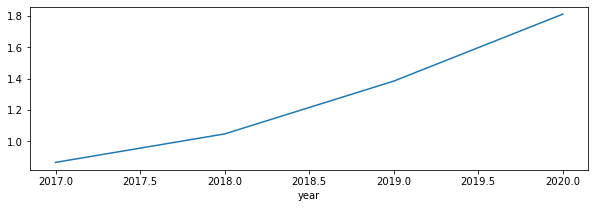

In [183]:
cum_rtn_str_df.plot(figsize=(10,3))